Thyroid Diesease Prediction

age - age of the patient (int)

sex - sex patient identifies (str)

on_thyroxine - whether patient is on thyroxine (bool)

query on thyroxine - *whether patient is on thyroxine (bool)

on antithyroid meds - whether patient is on antithyroid meds (bool)

sick - whether patient is sick (bool)

pregnant - whether patient is pregnant (bool)

thyroid_surgery - whether patient has undergone thyroid surgery (bool)

I131_treatment - whether patient is undergoing I131 treatment (bool)

query_hypothyroid - whether patient believes they have hypothyroid (bool)

query_hyperthyroid - whether patient believes they have hyperthyroid (bool)

lithium - whether patient * lithium (bool)

goitre - whether patient has goitre (bool)

tumor - whether patient has tumor (bool)

hypopituitary - whether patient * hyperpituitary gland (float)

psych - whether patient * psych (bool)

TSH_measured - whether TSH was measured in the blood (bool)

TSH - TSH level in blood from lab work (float)

T3_measured - whether T3 was measured in the blood (bool)

T3 - T3 level in blood from lab work (float)

TT4_measured - whether TT4 was measured in the blood (bool)

TT4 - TT4 level in blood from lab work (float)

T4U_measured - whether T4U was measured in the blood (bool)

T4U - T4U level in blood from lab work (float)

FTI_measured - whether FTI was measured in the blood (bool)

FTI - FTI level in blood from lab work (float)

TBG_measured - whether TBG was measured in the blood (bool)

TBG - TBG level in blood from lab work (float)

referral_source - (str)

binary class

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.4)

In [ ]:
df = pd.read_csv('/content/sample_data/ThyroidDisease.csv')
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [ ]:
df.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,2
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,P
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [ ]:
df["binaryClass"].value_counts()

P    3481
N     291
Name: binaryClass, dtype: int64

In [ ]:
df["binaryClass"]=df["binaryClass"].map({"P":0,"N":1})

In [ ]:
df=df.replace({"t":1,"f":0})

In [ ]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64

In [ ]:
df["TBG"].value_counts()

?    3772
Name: TBG, dtype: int64

In [ ]:
del df["TBG"]

In [ ]:
df=df.replace({"?":np.NAN})

In [ ]:
df["sex"].value_counts()

F    2480
M    1142
Name: sex, dtype: int64

In [ ]:
df=df.replace({"F":1,"M":0})

In [ ]:
df["referral source"].value_counts()

other    2201
SVI      1034
SVHC      386
STMW      112
SVHD       39
Name: referral source, dtype: int64

In [ ]:
del df["referral source"]

In [ ]:
df.dtypes

age                           object
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                           object
T3 measured                    int64
T3                            object
TT4 measured                   int64
TT4                           object
T4U measured                   int64
T4U                           object
FTI measured                   int64
FTI                           object
TBG measured                   int64
b

In [ ]:
cols = df.columns[df.dtypes.eq('object')]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df.dtypes

age                          float64
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
b

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

In [ ]:
df['TSH'] = imputer.fit_transform(df[['TSH']])
df['T3'] = imputer.fit_transform(df[['T3']])
df['TT4'] = imputer.fit_transform(df[['TT4']])
df['T4U'] = imputer.fit_transform(df[['T4U']])
df['FTI'] = imputer.fit_transform(df[['FTI']])
df['T4U measured'] = imputer.fit_transform(df[['T4U measured']])
df['sex'] = imputer.fit_transform(df[['sex']])
df['age'] = imputer.fit_transform(df[['age']])

In [ ]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
binaryClass                  0
dtype: int64

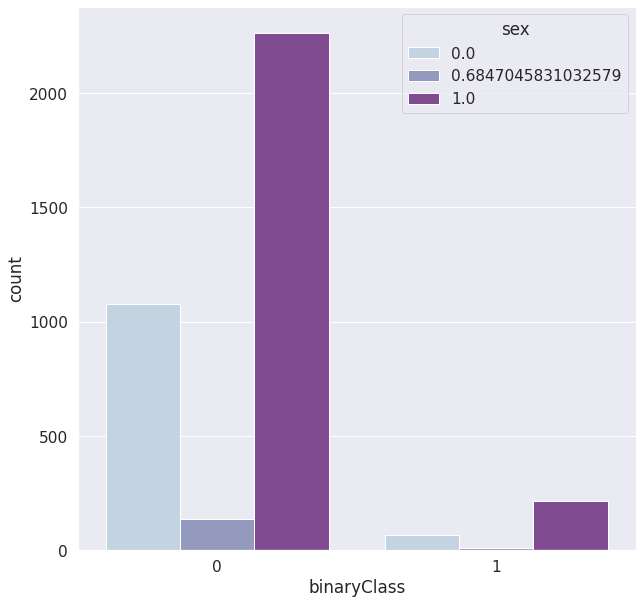

In [ ]:
sns.countplot(x='binaryClass', data=df, hue='sex', palette='BuPu')

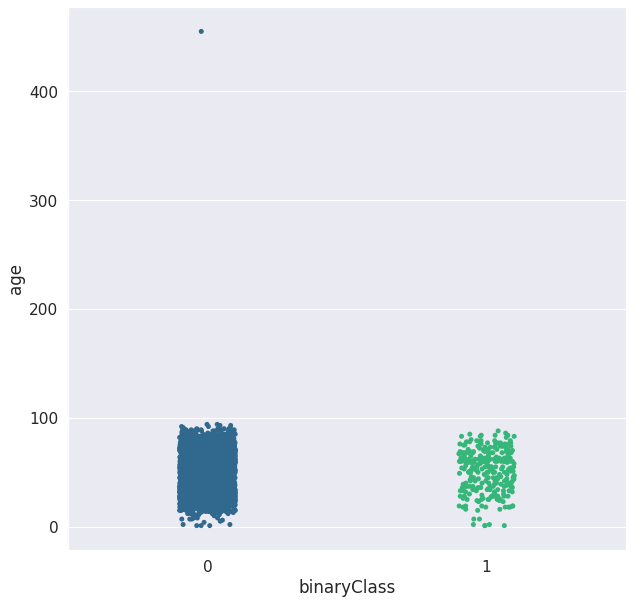

In [ ]:
sns.stripplot(x="binaryClass", y="age", data=df, palette="viridis")

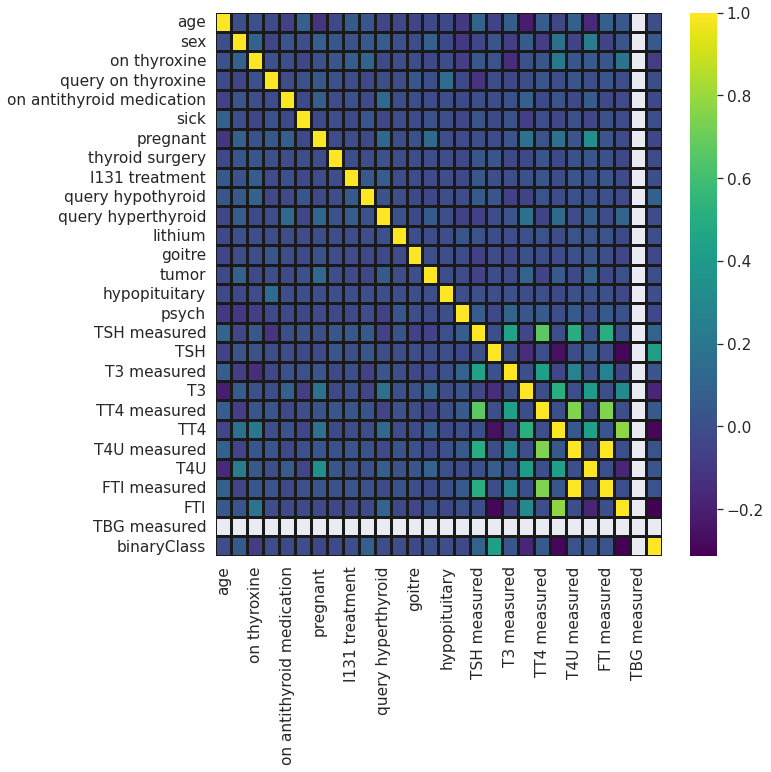

In [ ]:
sns.heatmap(df.corr(), cmap='viridis', linecolor='k', linewidths=2, annot=False)

In [ ]:
x = df.drop('binaryClass', axis=1)
y = df['binaryClass']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=192529)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn import metrics
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9957582184517497
